In [1]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
additional_metrics = ['acc']
loss_function = BinaryCrossentropy()
number_of_epochs = 500
optimizer = Adam()
verbosity_mode = 0
layer_size = 10

In [5]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [8]:
m=75000
n=25000
r=0.5

In [20]:
x_pos = np.random.normal(loc=0, scale=5*n, size=(int(n*r*0.5)))
x_pos_2 = np.random.normal(loc=40*n, scale=5*n, size=(int(n*r*0.5)))

x_neg= np.random.normal(loc=20*n, scale=5*n, size=(n-int(n*r))//2)
x_neg_2 = np.random.normal(loc=60*n, scale=5*n, size=(n-int(n*r))//2)

x_train = np.concatenate((x_pos,x_neg_2,x_pos_2, x_neg)).reshape(-1, 1).astype(int)

y_train = np.concatenate((np.ones(int(n*r*0.5)), np.zeros((n-int(n*r))//2),np.ones(int(n*r*0.5)),np.zeros((n-int(n*r))//2))).reshape(-1, 1).astype(int)





x_pos = np.random.normal(loc=250, scale=100, size=(int(n*r)))
x_neg = np.random.normal(loc=750, scale=100, size=(n-int(n*r)))

x_train = np.concatenate((x_pos, x_neg)).reshape(-1, 1).astype(int)
y_train = np.concatenate((np.ones(int(n*r)), np.zeros(n-int(n*r)))).reshape(-1, 1).astype(int)

In [21]:
new_data = []
mean=np.mean(x_train)
std = np.std(x_train)
for x in x_train:
    new_data += [(x-mean)/std]
x_train = np.array(new_data)

In [22]:
x_train.shape

(25000, 1)

In [23]:
y_train[12499]

array([0])

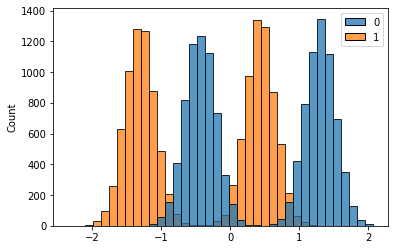

In [24]:
sns.histplot(x=x_train.flatten(), hue=y_train.flatten())

## Model training

In [25]:
batch_size = len(x_train)

In [26]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

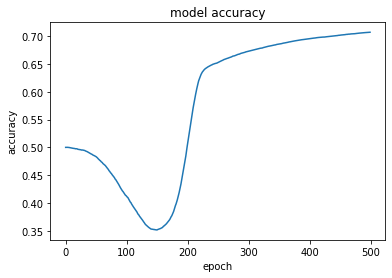

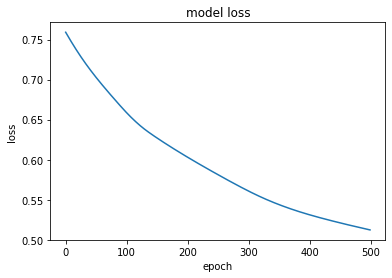

In [27]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

In [ ]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=0.1)

In [47]:
number_of_epochs = 1000
layer_size = 10

In [48]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [49]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [50]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

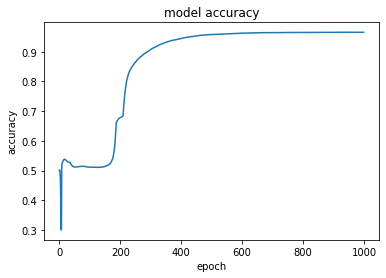

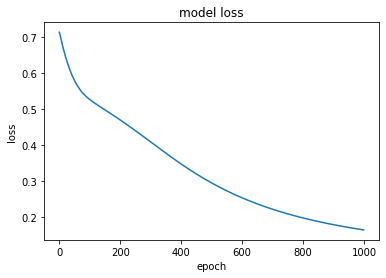

In [52]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

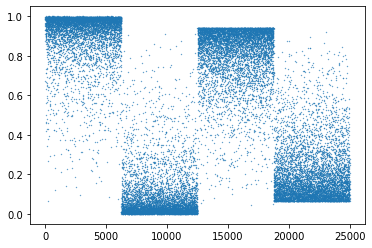

In [53]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=0.1)

In [56]:
layer_size = 5
number_of_epochs = 500
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


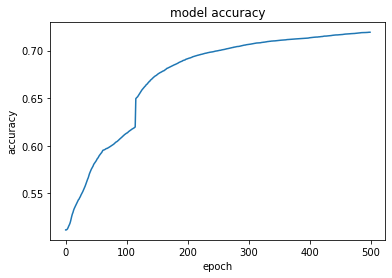

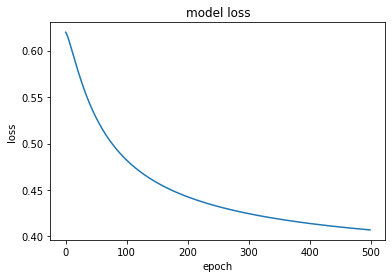

In [57]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=5
#epochs 500

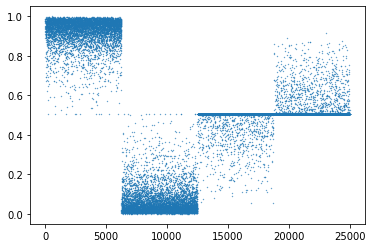

In [58]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=0.1)

In [59]:
number_of_epochs = 800
layer_size = 10
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


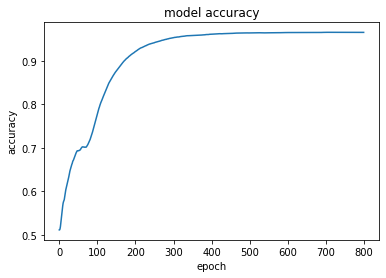

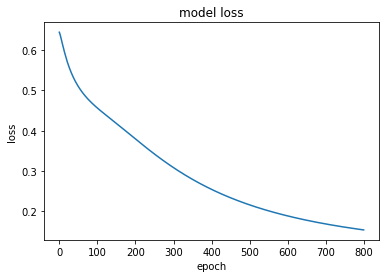

In [60]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10
#epochs 800

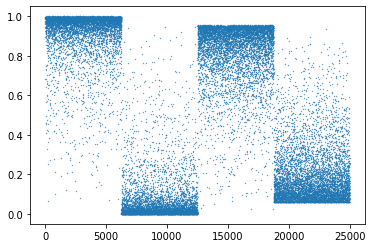

In [61]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=0.1)

In [69]:
class BloomFilter:
    
    def __init__(self, size, model): #hash count is 1
        self.size = size
      #  self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.model=model #classifier model associated as hash function
        
    def add(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        self.bit_array[result] = 1
            
    def lookup(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        if self.bit_array[result] == 0:
                return False
        return True

#adds ratio r of an array of random integers of size n to bloom filter bf(input : bf,size,ratio; output: data array)
def addrandom(bf,n,r):
    data=np.empty(n,dtype=int)
    for i in range(0,n):
        data[i]=random.randint(0, 100000000)
    for j in range(0,int(n*r)):
        bf.add(data[j]);
    return data

#(Input:bloom filter,number array,ratio of positives; Output:(-1) for false negative, otherwise fpr)
def fpr(bf,nums,r):
    count = 0
    for i in range(0,len(nums)):
        if((bf.lookup(nums[i])==False)and(y_train[i])==1):
            print(nums[i])
            return -1
        if((bf.lookup(nums[i])==True)and(y_train[i]==0)):
            count+=1
    return count/(len(nums)-int(len(nums)*r))

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k

#(Input:size of bloom filter, number of hash functions, total numbers, ratio of numbers inserted; Output: fpr)
def find_fpr(m,model,n,r):
    bf=BloomFilter(model,m)
    data=addrandom(bf,n,r)
    return fpr(bf,data,r)

#(Input:size of bloom filter, total numbers, ratio of numbers inserted; Output: prints inputs and fpr)
def outputs(m,n,r):
    find_fpr(m,model,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

In [70]:
bf=BloomFilter(m,model)

In [71]:
def load_bloom(data_x,y_train,bf,r):
    for i in range(0,len(data_x)):
        #print({i})
        if(y_train[i]==1):
            bf.add(data_x[i])
    return

In [72]:
load_bloom(x_train,y_train,bf,r)

In [73]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(len(x_train)):
    if(bf.lookup(x_train[i]) and y_train[i]==1): tp+=1
    if(bf.lookup(x_train[i]) and y_train[i]==0): fp+=1
    if((bf.lookup(x_train[i])==False) and y_train[i]==1): fn+=1
    if((bf.lookup(x_train[i])==False) and y_train[i]==0): tn+=1

print(tp)
print(fp)
print(tn)
print(fn)

12500
89
12411
0


In [116]:
model.predict(x_train[1950])

array([[0.65416145]], dtype=float32)

In [74]:
print(fpr(bf,x_train,r))

0.00712


0.00176
